# Twitter Scraper

** Tried to scrape Indiegogo first, but...**

Information on [page](https://www.indiegogo.com/private_api/explore?filter_category=Art&filter_funding=&filter_percent_funded=&filter_quick=new&filter_status=&per_page=12&pg_num=2), but indiegogo is a private API. So going to use twitter instead

In [27]:
# Importing twitter and libraries along with my passwords (replaced for visual sake)
import twitter, re, datetime, json, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
# your keys go here:
twitter_keys = {
    'consumer_key':        'my-key',
    'consumer_secret':     'my-secret',
    'access_token_key':    'my-tokenkey',
    'access_token_secret': 'my-tokensecret'
}

api = twitter.Api(
    consumer_key         =   twitter_keys['consumer_key'],
    consumer_secret      =   twitter_keys['consumer_secret'],
    access_token_key     =   twitter_keys['access_token_key'],
    access_token_secret  =   twitter_keys['access_token_secret']
)

In [40]:
# A helper function to mine tweets from specific users.
class TweetMiner(object):

    result_limit    =   20    
    api             =   False
    data            =   []
    
    def __init__(self, keys_dict, api, result_limit = 20):
        
        self.api = api
        self.twitter_keys = keys_dict
        
        self.result_limit = result_limit
        

    def mine_user_tweets(self, user="dyerrington", max_pages=5):

        data           =  []
        last_tweet_id  =  False
        page           =  1
        
        while page <= max_pages:
            
            if last_tweet_id:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit, max_id=last_tweet_id - 1)        
            else:
                statuses   =   self.api.GetUserTimeline(screen_name=user, count=self.result_limit)
                
            for item in statuses:

                mined = {
                    'tweet_id':        item.id,
                    'handle':          item.user.name,
                    'retweet_count':   item.retweet_count,
                    'text':            item.text,
                    'mined_at':        datetime.datetime.now(),
                    'created_at':      item.created_at,
                }
                
                last_tweet_id = item.id
                data.append(mined)
                
            page += 1
            
        return data

In [41]:
# Mining tweets from @Indiegogo and @SamsungIoT
miner = TweetMiner(twitter_keys, api, result_limit=200)
gogo = miner.mine_user_tweets(user='Indiegogo')
samsung = miner.mine_user_tweets(user='SamsungIoT')

In [45]:
# Changing data into a more easily digestible format
gogo_df = pd.DataFrame(gogo)
tx_df = pd.DataFrame(samsung)

In [47]:
# Checking the first 5 rows to see if data was transformed correctly
gogo_df.head()

,created_at,handle,mined_at,retweet_count,text,tweet_id
0,Thu Aug 24 01:37:01 +0000 2017,Indiegogo,2017-08-23 22:27:00.905,2,.@thewetsleeve lets you wear your water bottle...,900532363607908352
1,Thu Aug 24 00:37:01 +0000 2017,Indiegogo,2017-08-23 22:27:00.905,2,This phone case has military-grade protection ...,900517266927890432
2,Thu Aug 24 00:05:16 +0000 2017,Indiegogo,2017-08-23 22:27:00.905,0,@OneResister @slpng_giants Thanks for bringing...,900509274480062465
3,Wed Aug 23 23:52:46 +0000 2017,Indiegogo,2017-08-23 22:27:00.905,2,Marketing Tips from 4 Companies at the Top of ...,900506130169946112
4,Wed Aug 23 23:00:03 +0000 2017,Indiegogo,2017-08-23 22:27:00.905,3,August Arrivals: 9 Crowdfunded Products Shippi...,900492862680379395


## Also found a loaded json ready to go that is updated monthly

I don't have the API key yet, so I opted to use this [website](https://webrobots.io/indiegogo-dataset/)

In [3]:
# Same procedure as Kickstarter's page
products = []
for line in open('../datasets/Indiegogo_2017-08-15T21_40_34_667Z.json/Indiegogo_2017-08-15T21_40_34_667Z.json', encoding='utf-8'):
    products.append(json.loads(line))

In [4]:
# The file is very large, so only looking at 50 products
products = products[0:10000]

In [7]:
# Looking at one product
products[0]

{'created_at': '2017-08-16T06:11:52.256841',
 'data': {'amt_time_left': '25 hours left',
  'balance': '$0',
  'cached_collected_pledges_count': 0,
  'card_type': 'project',
  'category_name': 'Culture',
  'category_slug': 'culture',
  'category_url': '/explore/culture',
  'collected_percentage': '0%',
  'compressed_image_url': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_361,w_361/v1502367507/fzqszlkcqrnqcbciihqe.jpg',
  'currency_code': 'USD',
  'friend_contributors': [],
  'friend_team_members': [],
  'id': 2188988,
  'igg_image_url': 'https://c1.iggcdn.com/indiegogo-media-prod-cld/image/upload/c_fill,f_auto,h_361,w_361/v1502367507/fzqszlkcqrnqcbciihqe.jpg',
  'in_forever_funding': False,
  'nearest_five_percent': 0,
  'partner_name': None,
  'source_url': 'https://www.indiegogo.com/explore/all?quick_filter=trending&location=everywhere&project_type=all&percent_funded=all&goal_type=all&more_options=false&status=all',
  'tagline': "Let's have a big celeb

In [19]:
# Transform above data into data that can be read in a table
from pandas.io.json import json_normalize
full_df = json_normalize(products)
full_df.head()

,created_at,data.amt_time_left,data.balance,data.cached_collected_pledges_count,data.card_type,data.category_name,data.category_slug,data.category_url,data.collected_percentage,data.compressed_image_url,...,data.nearest_five_percent,data.partner_name,data.source_url,data.tagline,data.title,data.url,id,robot_id,run_id,table_id
0,2017-08-16T06:11:52.256841,25 hours left,$0,0,project,Culture,culture,/explore/culture,0%,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,0,None,https://www.indiegogo.com/explore/all?quick_fi...,Let's have a big celebration for our new Compa...,Playmore Games Housewarming Party,/projects/playmore-games-housewarming-party,373097861,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
1,2017-08-16T06:11:19.287105,30 days left,$0,0,project,Local Businesses,local-businesses,/explore/local-businesses,0%,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,0,None,https://www.indiegogo.com/explore/all?quick_fi...,Polish your lips with unique lip scrubs and he...,Bjõrn handmade in love and passion cosmetics,/projects/bjorn-handmade-in-love-and-passion-c...,373097785,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
2,2017-08-16T06:11:19.287105,60 days left,$0,0,project,Local Businesses,local-businesses,/explore/local-businesses,0%,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,0,None,https://www.indiegogo.com/explore/all?quick_fi...,I design for a living - and my computer is dying.,Web & Graphic Designer Needs New Computer,/projects/web-graphic-designer-needs-new-computer,373097785,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
3,2017-08-16T06:11:19.287105,55 days left,$0,0,project,Local Businesses,local-businesses,/explore/local-businesses,0%,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,0,None,https://www.indiegogo.com/explore/all?quick_fi...,I'm going to grow pigs for the needs of my cit...,PigFarm,/projects/pigfarm-farm-farming,373097785,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
4,2017-08-16T06:11:19.287105,54 days left,$0,0,project,Local Businesses,local-businesses,/explore/local-businesses,0%,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,0,None,https://www.indiegogo.com/explore/all?quick_fi...,We're looking to bring an indoor rock climbing...,SW Florida needs a Rock Climbing Gym,/projects/sw-florida-needs-a-rock-climbing-gym...,373097785,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo


In [38]:
df = full_df[full_df['data.currency_code'] == 'USD'].copy()
df.rename(columns={'data.balance': 'money_raised', 'data.cached_collected_pledges_count':'backers_count'}, inplace=True)
df['money_raised'] = df['money_raised'].map(lambda x: int(round(float(x.replace(',','').strip('$')))))
df['data.collected_percentage'] = df['data.collected_percentage'].map(lambda x: int(round(float(x.strip('%')))))
df[df['money_raised']>0]

,created_at,data.amt_time_left,money_raised,backers_count,data.card_type,data.category_name,data.category_slug,data.category_url,data.collected_percentage,data.compressed_image_url,...,data.nearest_five_percent,data.partner_name,data.source_url,data.tagline,data.title,data.url,id,robot_id,run_id,table_id
10,2017-08-16T06:10:53.454476,56 days left,955,8,project,Community Projects,community-projects,/explore/community-projects,12,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,10,None,https://www.indiegogo.com/explore/all?quick_fi...,"Gala, Film Bollywood, Yoga, Cours de Musique I...","Festival Pictures of India Lausanne, 3-5 Nov. ...",/projects/festival-pictures-of-india-lausanne-...,373097722,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
13,2017-08-16T06:10:37.857891,30 days left,23560,54,project,Fashion & Wearables,fashion-wearables,/explore/fashion-wearables,17,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,15,None,https://www.indiegogo.com/explore/all?quick_fi...,"NOT new Luxury definition, NOT pimped brand IT...",Balticus Automatic Bronze Watches,/projects/balticus-automatic-bronze-watches,373097681,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
14,2017-08-16T06:10:37.857891,8 days left,7094,23,project,Tech & Innovation,tech-innovation,/explore/tech-innovation,14,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,10,None,https://www.indiegogo.com/explore/all?quick_fi...,"Versatile foldable drone, with 4K, 28min fligh...",Gobe Drone - Fly Smarter,/projects/gobe-drone-fly-smarter-travel,373097681,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
15,2017-08-16T06:10:37.857891,25 days left,6580,36,project,Transportation,transportation,/explore/transportation,22,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,20,None,https://www.indiegogo.com/explore/all?quick_fi...,"6 in 1 Board: 6 times stronger, recyclable, wa...",CAPSULE: Unbreakable &Green Skateboards-Longbo...,/projects/capsule-unbreakable-green-skateboard...,373097681,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
16,2017-08-16T06:10:37.857891,3 days left,4642,15,project,Energy & Green Tech,energy-green-tech,/explore/energy-green-tech,3,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,2,None,https://www.indiegogo.com/explore/all?quick_fi...,"aTree grows fresh fruits, vegetables, and herb...",Applant - aTree in your home,/projects/applant-atree-in-your-home-lifestyle...,373097681,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
17,2017-08-16T06:10:37.857891,49 hours left,4306,35,project,Food & Beverages,food-beverages,/explore/food-beverages,3,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,2,None,https://www.indiegogo.com/explore/all?quick_fi...,WE WANT TO CHANGE THE WORLD!,Let's Get Good! Organic Energy Drinks,/projects/let-s-get-good-organic-energy-drinks,373097681,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
18,2017-08-16T06:10:37.857891,4 days left,4277,11,project,Audio,audio,/explore/audio,5,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,5,None,https://www.indiegogo.com/explore/all?quick_fi...,"USB DAC, powerful headphone amplifier and wire...",KUOS RealAmp - 'Digital' Finally Sounds 'Real',/projects/kuos-realamp-digital-finally-sounds-...,373097681,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
20,2017-08-16T06:10:37.857891,3 days left,3758,27,project,Home,home,/explore/home,3,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,2,None,https://www.indiegogo.com/explore/all?quick_fi...,"The Pet Feeding, Instant Interaction, the One ...","Ó'PET FEEDER, One Of a Kind Mutual-Com. Pet Fe...",/projects/o-pet-feeder-one-of-a-kind-mutual-co...,373097681,Indiegogo,Indiegogo_2017-08-15T21_40_34_667Z,Indiegogo
21,2017-08-16T06:10:37.857891,38 days left,3607,25,project,Health & Fitness,health-fitness,/explore/health-fitness,7,https://c1.iggcdn.com/indiegogo-media-prod-cld...,...,5,None,https://www.indiegogo.com/explore/all?quick_fi...,"With a flashlight function and acorn shape, Lo..

## Same procedure in Kickstarter scraper would be performed on Indiegogo

---

Unfortunately, info on pledged amount is not readily available unless access to API is given. For now, can use percentage backed.

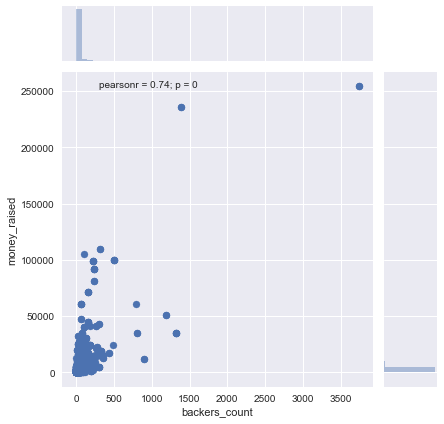

In [48]:
## Analysis of relationship between backers count and pledged percentage
sns.jointplot(df['backers_count'], df['money_raised'])
plt.show()